In [1]:
import pandas as pd
import numpy as np

import sys
import os
import pathlib
s = "/".join(str(pathlib.Path().absolute()).split("/")[:-1])
sys.path.append(s)

In [2]:
# these are categorical columns and the target SalePrice
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data_housing = pd.read_csv("../data/housing.csv")
data_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
from src.exploration.plots import countplot

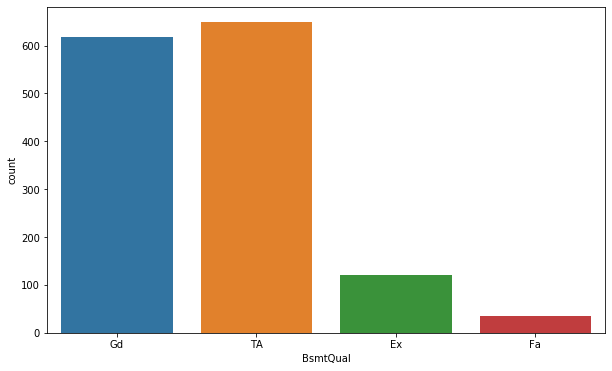

In [4]:
countplot(x="BsmtQual", data=data_housing, figsize=(10, 6))

In [5]:
from src.exploration.plots import kde_plot

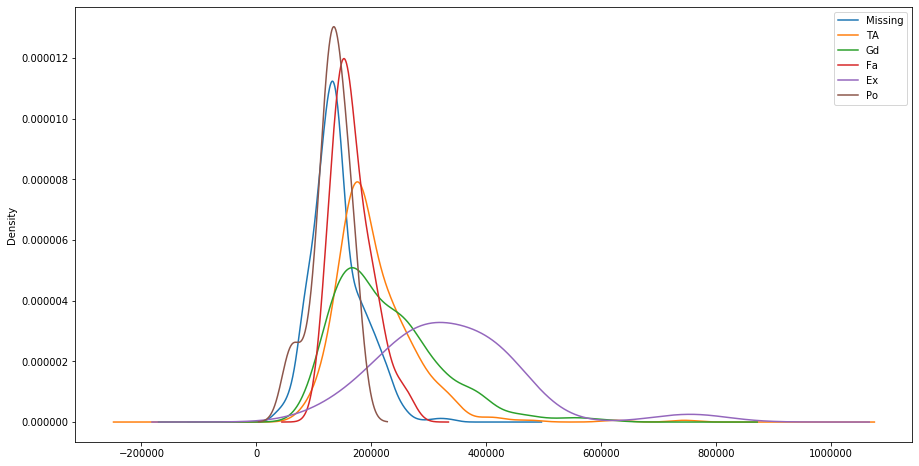

In [6]:
kde_plot(data=data_housing.fillna("Missing"), feature='FireplaceQu', target='SalePrice', figsize=(15, 8))

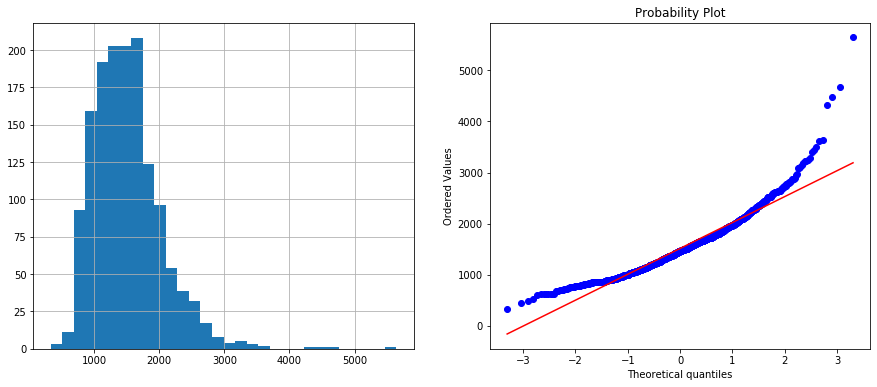

In [7]:
## diagnostic plot
from src.exploration.plots import diagnostic_plot
diagnostic_plot(data_housing, "GrLivArea")

In [8]:
from src.transformers.gaussian import LogarithmicTransformer

logarithmic_transformer = LogarithmicTransformer(features=["GrLivArea"])
logarithmic_transformer.fit(data_housing.copy())
tmp = logarithmic_transformer.transform(data_housing.copy())

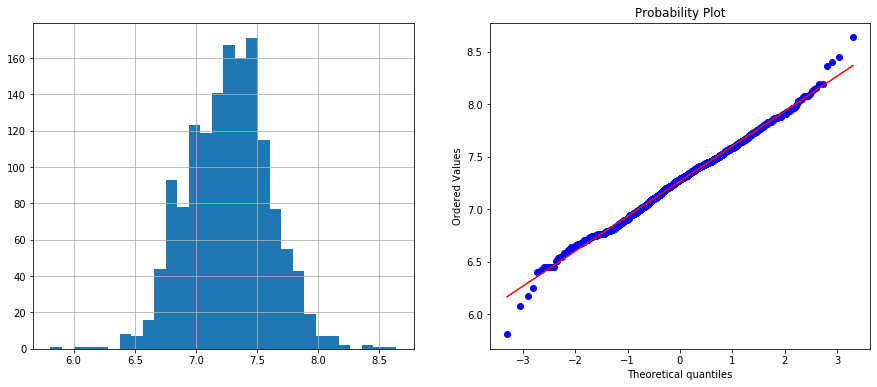

In [9]:
diagnostic_plot(tmp, "GrLivArea")

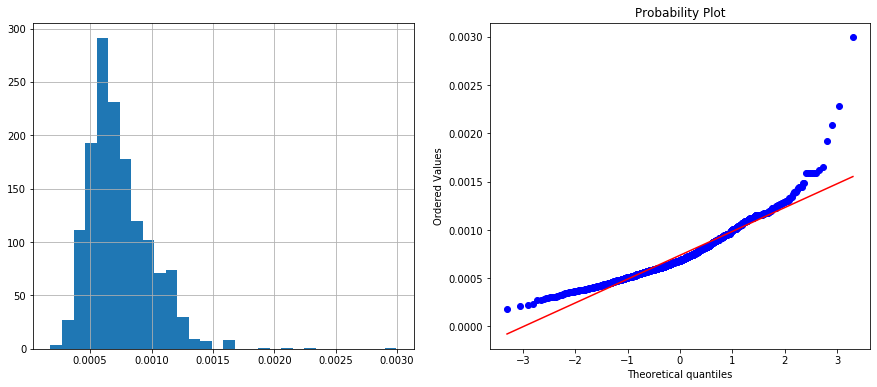

In [10]:
from src.transformers.gaussian import ReciprocalTransformer

transformer = ReciprocalTransformer(features=["GrLivArea"])
transformer.fit(data_housing.copy())
tmp = transformer.transform(data_housing.copy())
diagnostic_plot(tmp, "GrLivArea")

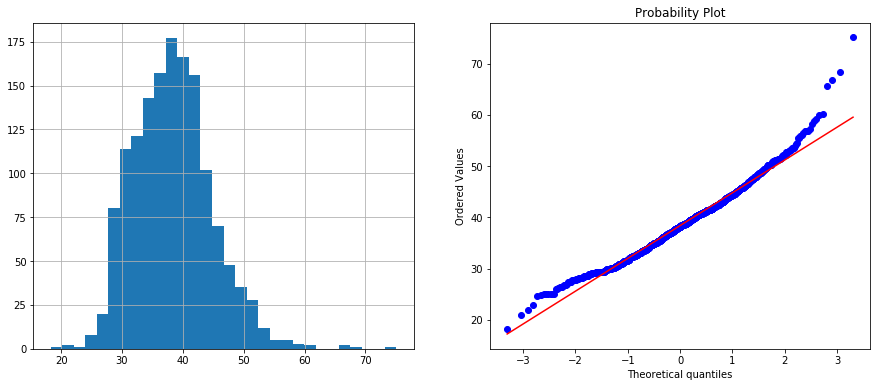

In [11]:
from src.transformers.gaussian import SquareRootTransformer

transformer = SquareRootTransformer(features=["GrLivArea"])
transformer.fit(data_housing.copy())
tmp = transformer.transform(data_housing.copy())
diagnostic_plot(tmp, "GrLivArea")

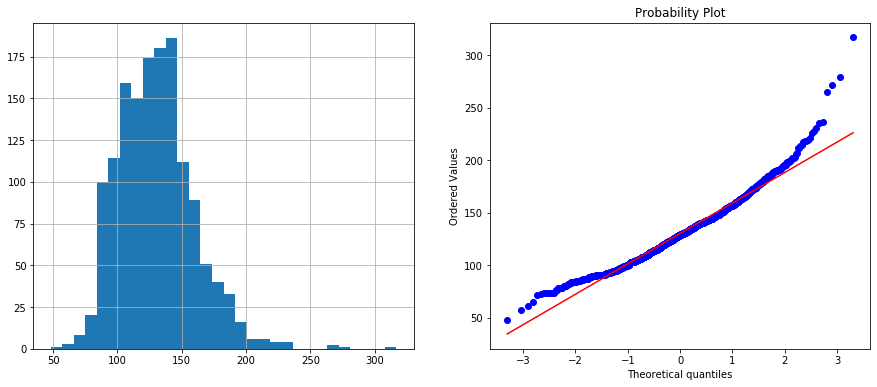

In [12]:
from src.transformers.gaussian import ExponentialTransformer

transformer = ExponentialTransformer(features=["GrLivArea"], exponent=(1/1.5))
transformer.fit(data_housing.copy())
tmp = transformer.transform(data_housing.copy())
diagnostic_plot(tmp, "GrLivArea")

{'GrLivArea': 0.006304810832611781}


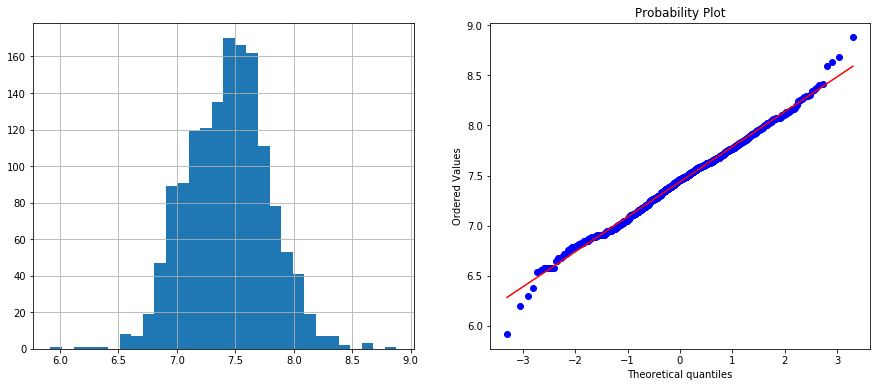

In [13]:
from src.transformers.gaussian import BoxCoxTransformer

transformer = BoxCoxTransformer(features=["GrLivArea"])
transformer.fit(data_housing.copy())
tmp = transformer.transform(data_housing.copy())
print(transformer.maxlog_dict_)
diagnostic_plot(tmp, "GrLivArea")

{'GrLivArea': 0.005539641278705955}


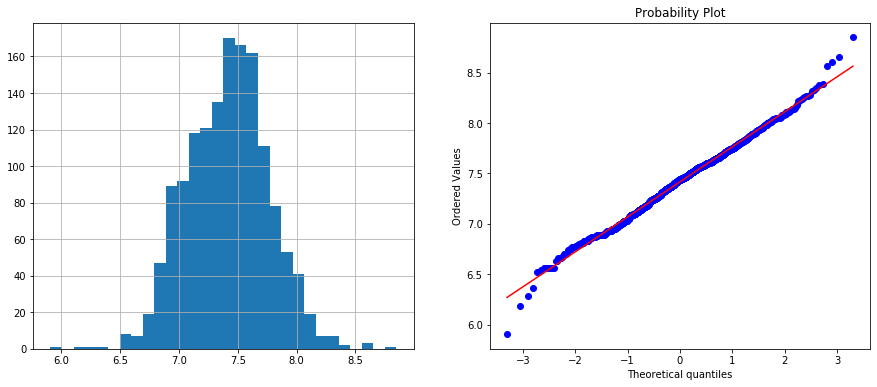

In [14]:
from src.transformers.gaussian import YeoJohnsonTransformer

transformer = YeoJohnsonTransformer(features=["GrLivArea"])
transformer.fit(data_housing.copy())
tmp = transformer.transform(data_housing.copy())
print(transformer.maxlog_dict_)
diagnostic_plot(tmp, "GrLivArea")

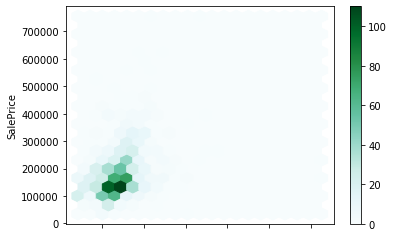

In [7]:
from src.exploration.plots import hexbin_plot
hexbin_plot(data=data_housing, x="LotFrontage", y="SalePrice", gridsize=20)